This notebook illustrates the allocation of land to A1 farmers by using K-means Clustering

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [22]:
data = pd.read_csv('./Data2.csv')

In [23]:
data.head()

,Region,Min Temperature (°C),Max Temperature (°C),Min Rainfall (mm),Max Rainfall (mm),Suitable Plants,Fertilizer_Usage,Pest_Incidence,Labor_Availability,Market_Access,Latitude,Longitude,Crop Yield (tons/ha),Humidity (%),Soil pH
0,NR II,11.004077,19.758442,800.600069,1191.746836,"Tobacco, Maize, Cotton, Wheat, Soybeans, Sorgh...",10.776568,2.436802,55.330001,37.752979,-18.131824,27.549598,6.379097,58.923697,6.027418
1,NR I,10.816030,19.023373,1081.520298,2091.587507,"Coffee, Tea, Bananas, Apples, Potatoes, Peas, ...",20.256833,5.472625,50.340687,54.735661,-20.048432,30.859975,8.017259,80.618611,5.683548
2,NR IV,27.137416,38.147434,505.100655,749.817097,"Drought-tolerant Maize, Sorghum, Pearl Millet,...",36.680267,24.498244,9.758948,10.088434,-19.809896,28.679102,3.230187,62.730184,5.598146
3,NR V,28.460751,41.841162,292.626374,803.932343,"Cattle, Game-ranching",51.822805,46.039781,14.342808,17.591870,-20.797487,28.941054,1.383723,56.890490,4.107096
4,NR III,19.442245,26.658988,486.435319,626.737037,"Maize, Cotton, Groundnuts, Sunflowers",39.628234,26.466224,15.678192,10.281220,-19.325166,29.552690,4.590995,61.968444,5.273699


In [24]:
#select features to use in our dataset
data_for_land_allocation = data.drop(columns=['Fertilizer_Usage', 'Humidity (%)', 'Market_Access', 'Latitude', 'Longitude', 'Soil pH'])

In [25]:
data_for_land_allocation.head()

,Region,Min Temperature (°C),Max Temperature (°C),Min Rainfall (mm),Max Rainfall (mm),Suitable Plants,Pest_Incidence,Labor_Availability,Crop Yield (tons/ha)
0,NR II,11.004077,19.758442,800.600069,1191.746836,"Tobacco, Maize, Cotton, Wheat, Soybeans, Sorgh...",2.436802,55.330001,6.379097
1,NR I,10.816030,19.023373,1081.520298,2091.587507,"Coffee, Tea, Bananas, Apples, Potatoes, Peas, ...",5.472625,50.340687,8.017259
2,NR IV,27.137416,38.147434,505.100655,749.817097,"Drought-tolerant Maize, Sorghum, Pearl Millet,...",24.498244,9.758948,3.230187
3,NR V,28.460751,41.841162,292.626374,803.932343,"Cattle, Game-ranching",46.039781,14.342808,1.383723
4,NR III,19.442245,26.658988,486.435319,626.737037,"Maize, Cotton, Groundnuts, Sunflowers",26.466224,15.678192,4.590995


In [26]:
# label encoding regions
data_for_land_allocation.replace(
    {
        "Region": {
            "NR I": 0,
            "NR II": 1,
            "NR III": 2,
            "NR IV": 3,
            "NR V": 4,
        }
    },
    inplace=True,
)

In [35]:
X = data_for_land_allocation.drop(columns='Region')

In [36]:
# label encoding regions
data_for_land_allocation.replace(
    {
        "Suitable Plants": {
            "Coffee, Tea, Bananas, Apples, Potatoes, Peas, Vegetables, Proteas": 0,
            "Tobacco, Maize, Cotton, Wheat, Soybeans, Sorghum, Groundnuts": 1,
            "Maize, Cotton, Groundnuts, Sunflowers": 2,
            "Drought-tolerant Maize, Sorghum, Pearl Millet, Finger Millet": 3,
            "Cattle, Game-ranching": 4,
        }
    },
    inplace=True,
)

In [37]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

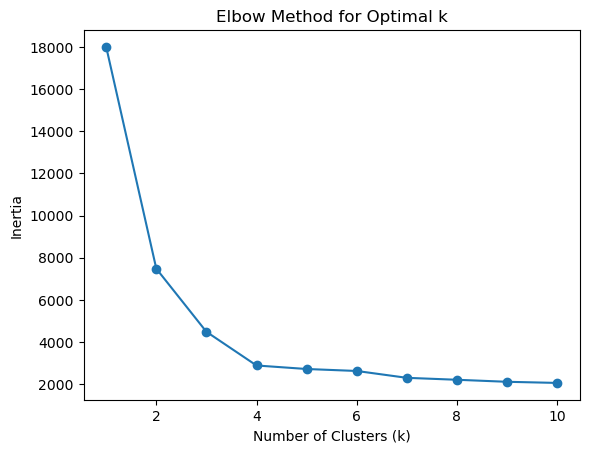

In [38]:
#   - Find the "elbow" point in the inertia plot to suggest the optimal k
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [39]:
# Apply K-means clustering
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(scaled_data)


KMeans(n_clusters=4, random_state=42)

In [41]:
# 5. Evaluate Clustering (Silhouette Score):
#   - Get a measure of how well the clusters are separated
silhouette_avg = silhouette_score(scaled_data, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.46317183480644636


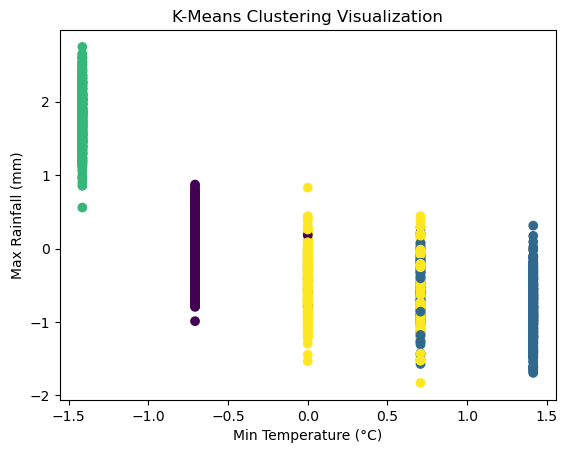

In [44]:
# 6. Visualize Clusters:
#   - Choose two features for visualization (e.g., temperature and rainfall)
plt.scatter(scaled_data[:, 0], scaled_data[:, 3], c=kmeans.labels_, cmap='viridis')  # Customize features as needed
plt.title('K-Means Clustering Visualization')
plt.xlabel('Min Temperature (°C)')
plt.ylabel('Max Rainfall (mm)')  # Customize labels as needed
plt.show()

In [47]:
# 7. Assign New Farmer Data:
#   - Get new farmer features and scale them
new_farmer_data = pd.DataFrame([[20, 30, 1200, 1500, -19.5, 28.8, 5]], columns=X)  # Example new farmer data
new_farmer_data_scaled = scaler.transform(new_farmer_data)
cluster_prediction = kmeans.predict(new_farmer_data_scaled)

ValueError: Index data must be 1-dimensional

In [30]:
# Get the cluster labels
labels = kmeans.labels_


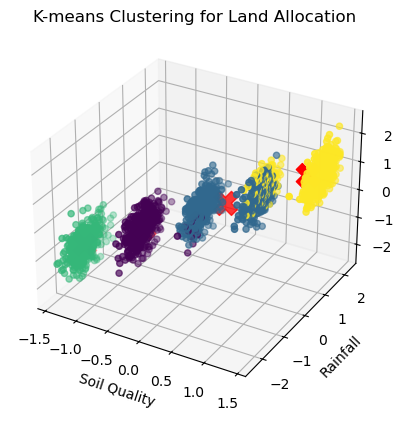

In [31]:
# Plot the clusters
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(scaled_data[:, 0], scaled_data[:, 1], scaled_data[:, 2], c=labels, cmap='viridis')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=300, c='red', marker='X')
ax.set_title('K-means Clustering for Land Allocation')
ax.set_xlabel('Soil Quality')
ax.set_ylabel('Rainfall')
ax.set_zlabel('Elevation')
plt.show()


In [33]:
import plotly.graph_objects as go

# Create a 3D scatter plot for the clusters
fig = go.Figure()

# Add the data points
fig.add_trace(go.Scatter3d(
    x=scaled_data[:, 0],
    y=scaled_data[:, 1],
    z=scaled_data[:, 2],
    mode='markers',
    marker=dict(
        size=5,
        color=labels,
        colorscale='Viridis',
        opacity=0.8
    )
))

# Add the cluster centers
fig.add_trace(go.Scatter3d(
    x=kmeans.cluster_centers_[:, 0],
    y=kmeans.cluster_centers_[:, 1],
    z=kmeans.cluster_centers_[:, 2],
    mode='markers',
    marker=dict(
        size=10,
        color='red',
        symbol='x'
    )
))

# Set the title and axis labels
fig.update_layout(
    title='K-means Clustering for Land Allocation',
    scene=dict(
        xaxis_title='Soil Quality',
        yaxis_title='Rainfall',
        zaxis_title='Elevation'
    )
)

# Show the plot
fig.show()


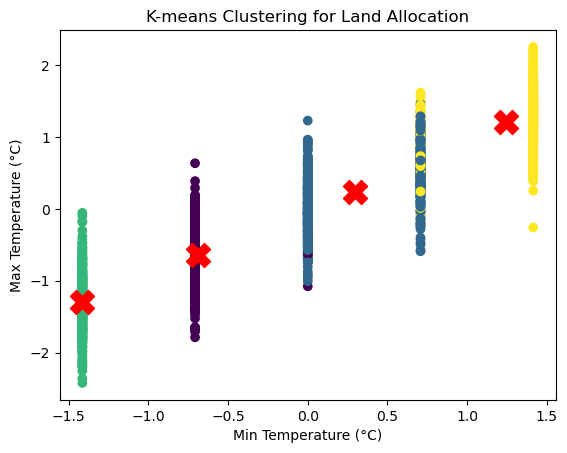

      Region  Min Temperature (°C)  Max Temperature (°C)  Min Rainfall (mm)  \
0          1             11.004077             19.758442         800.600069   
1          0             10.816030             19.023373        1081.520298   
2          3             27.137416             38.147434         505.100655   
3          4             28.460751             41.841162         292.626374   
4          2             19.442245             26.658988         486.435319   
...      ...                   ...                   ...                ...   
1995       1             13.851866             21.034837         646.281945   
1996       4             34.385288             43.352831         267.442350   
1997       3             25.133492             29.516693         584.319255   
1998       2             17.266927             34.523115         427.062283   
1999       0             10.316578             20.558226        1015.055465   

      Max Rainfall (mm)  Suitable Plants  Pest_Inci

In [32]:
# Add the cluster labels to the original dataframe
data_for_land_allocation['Cluster'] = labels

# Plot the clusters
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X')
plt.title('K-means Clustering for Land Allocation')
plt.xlabel('Min Temperature (°C)')
plt.ylabel('Max Temperature (°C)')
plt.show()

print(data_for_land_allocation)

In [34]:
import plotly.express as px
import pandas as pd

# Assuming data_for_land_allocation is a DataFrame and scaled_data is a numpy array
data_for_land_allocation['Min Temperature (°C)'] = scaled_data[:, 0]
data_for_land_allocation['Max Temperature (°C)'] = scaled_data[:, 1]

# Create a scatter plot
fig = px.scatter(
    data_for_land_allocation,
    x='Min Temperature (°C)',
    y='Max Temperature (°C)',
    color='Cluster',
    title='K-means Clustering for Land Allocation',
    labels={'x': 'Min Temperature (°C)', 'y': 'Max Temperature (°C)'}
)

# Add cluster centers
fig.add_trace(go.Scatter(
    x=kmeans.cluster_centers_[:, 0],
    y=kmeans.cluster_centers_[:, 1],
    mode='markers',
    marker=dict(
        size=10,
        color='red',
        symbol='x'
    ),
    name='Cluster Centers'
))

# Show the plot
fig.show()

# Print the DataFrame
print(data_for_land_allocation)


      Region  Min Temperature (°C)  Max Temperature (°C)  Min Rainfall (mm)  \
0          1             -0.707107             -1.160912         800.600069   
1          0             -1.414214             -1.185324        1081.520298   
2          3              0.707107              0.933525         505.100655   
3          4              1.414214              1.105321         292.626374   
4          2              0.000000             -0.065465         486.435319   
...      ...                   ...                   ...                ...   
1995       1             -0.707107             -0.791211         646.281945   
1996       4              1.414214              1.874447         267.442350   
1997       3              0.707107              0.673375         584.319255   
1998       2              0.000000             -0.347866         427.062283   
1999       0             -1.414214             -1.250164        1015.055465   

      Max Rainfall (mm)  Suitable Plants  Pest_Inci